In [ ]:
#1 importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#2 Reading the dataset
df=pd.read_csv('/content/titanic_dataset (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Basic details of the dataset

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Pre processing

In [ ]:
# Make ‘PassengerId’ as the index column
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


missing value handling

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

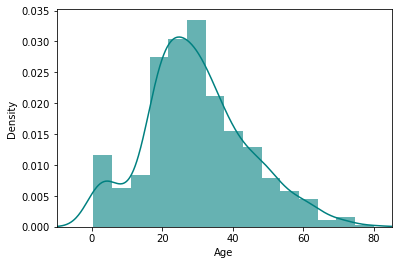

In [ ]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [ ]:
#Since "Age" is (right) skewed use the median to impute the missing values.
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df=df.drop(["Cabin"],axis=1)

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'] = df['Embarked'].fillna("S")

In [ ]:
df.isna().sum()
#now we have the clean data

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
dummies = pd.get_dummies(df.Sex)
inputs=pd.concat([df,dummies],axis=1)
df = inputs.drop(["Sex"],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


SibSp (int) - Number of siblings and spouses aboard &   Parch (int) - Number of parents and children aboard

So we can combine SibSp & Parch as family count


In [ ]:
df['Family_cnt'] = df['SibSp'] + df['Parch']
df.drop([ 'SibSp', 'Parch'], axis=1, inplace=True)

In [ ]:
#Drop unnnecessary variables
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [ ]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
print(df['Embarked'].unique())

[2 0 1]


In [ ]:
df.head()

,Survived,Pclass,Age,Fare,Embarked,female,male,Family_cnt
0,0,3,22.0,7.2500,2,0,1,1
1,1,1,38.0,71.2833,0,1,0,1
2,1,3,26.0,7.9250,2,1,0,0
3,1,1,35.0,53.1000,2,1,0,1
4,0,3,35.0,8.0500,2,0,1,0


In [ ]:
df.describe()

,Survived,Pclass,Age,Fare,Embarked,female,male,Family_cnt
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,1.536476,0.352413,0.647587,0.904602
std,0.486592,0.836071,13.019697,49.693429,0.791503,0.477990,0.477990,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,14.454200,2.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,35.000000,31.000000,2.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,2.000000,1.000000,1.000000,10.000000


Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(df)
df=pd.DataFrame(scaled_values,columns=['Survived','Pclass', 'Age','Fare','Embarked','female','male','Family_cnt'])



Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

y=df['Survived']
x=df.drop('Survived',axis=1)


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print(xtrain)
print(xtest)
print(ytrain)
print(ytest)

     Pclass       Age      Fare  Embarked  female  male  Family_cnt
331     0.0  0.566474  0.055628       1.0     0.0   1.0         0.0
733     0.5  0.283740  0.025374       1.0     0.0   1.0         0.0
382     1.0  0.396833  0.015469       1.0     0.0   1.0         0.0
704     1.0  0.321438  0.015330       1.0     0.0   1.0         0.1
813     1.0  0.070118  0.061045       1.0     1.0   0.0         0.6
..      ...       ...       ...       ...     ...   ...         ...
106     1.0  0.258608  0.014932       1.0     1.0   0.0         0.0
270     0.0  0.346569  0.060508       1.0     0.0   1.0         0.0
860     1.0  0.509927  0.027538       1.0     0.0   1.0         0.2
435     0.0  0.170646  0.234224       1.0     1.0   0.0         0.3
102     0.0  0.258608  0.150855       1.0     0.0   1.0         0.1

[712 rows x 7 columns]
     Pclass       Age      Fare  Embarked  female  male  Family_cnt
709     1.0  0.346569  0.029758       0.0     0.0   1.0         0.2
439     0.5  0.384267  0

In [ ]:
#accuracy metrices
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score

Support vector machine classifier

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

svm_model=svc.fit(xtrain,ytrain)
ypred_svm=svm_model.predict(xtest)

confusion_matrix(ytest,ypred_svm)

array([[88, 17],
       [22, 52]])

In [ ]:
accuracy_score(ytest,ypred_svm)

0.7821229050279329

In [ ]:
recall_score(ytest,ypred_svm)

0.7027027027027027

KNeighbors Classifier

In [ ]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(xtrain,ytrain)
  ypred_KNN=classifier.predict(xtest)
  acc=accuracy_score(ytest,ypred_KNN)
  metric_k.append(acc)

metric_k  

[0.7821229050279329,
 0.7821229050279329,
 0.7988826815642458,
 0.7932960893854749,
 0.7877094972067039,
 0.8044692737430168,
 0.8100558659217877,
 0.8044692737430168,
 0.8156424581005587,
 0.8100558659217877,
 0.8044692737430168,
 0.7932960893854749]

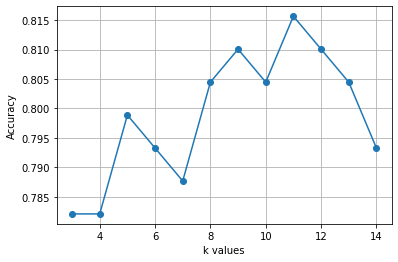

In [ ]:
import matplotlib.pyplot as plt
plt.plot(neighbors,metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
# fitting K-NN 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)

knn_model=classifier.fit(xtrain,ytrain)
ypred_knn = knn_model.predict(xtest)


confusion_matrix(ytest,ypred_knn)

array([[95, 10],
       [23, 51]])

In [ ]:
accuracy_score(ytest,ypred_knn)

0.8156424581005587

In [ ]:
recall_score(ytest,ypred_knn)

0.6891891891891891

#K-Fold

In [ ]:
models = list()


#here is the list of the models we'll try 
models.append(SVC())
models.append(KNeighborsClassifier())

kf3 = KFold(n_splits=3, shuffle=False)
for model in models :
    i = 1
    for train_index, test_index in kf3.split(df):
   
        
    #Train the model
      model.fit(xtrain, ytrain) #Training the model
      print(f'Accuracy for the fold no. {i} for the', model ,'on the test set:' ,{accuracy_score(ytest, model.predict(xtest))})
      i += 1

Accuracy for the fold no. 1 for the SVC() on the test set: {0.7932960893854749}
Accuracy for the fold no. 2 for the SVC() on the test set: {0.7932960893854749}
Accuracy for the fold no. 3 for the SVC() on the test set: {0.7932960893854749}
Accuracy for the fold no. 1 for the KNeighborsClassifier() on the test set: {0.7988826815642458}
Accuracy for the fold no. 2 for the KNeighborsClassifier() on the test set: {0.7988826815642458}
Accuracy for the fold no. 3 for the KNeighborsClassifier() on the test set: {0.7988826815642458}


#Stratified KFold

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


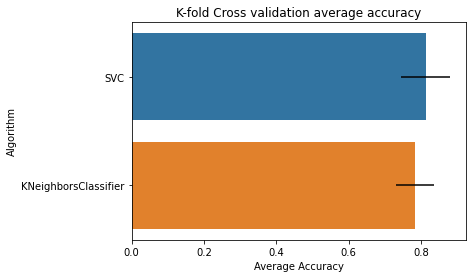

In [ ]:
models = list()


#here is the list of the models we'll try 
models.append(SVC())
models.append(KNeighborsClassifier())

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

cv_results = []
cv_names = []

for model in models :
    #print('go:', model)
    cv_results.append(cross_val_score(model, xtrain, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=4))
    cv_names.append(model.__class__.__name__)
    #print('end:', model)

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":cv_names})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,orient = "h",**{'xerr':cv_std})
g.set_xlabel("Average Accuracy")
g = g.set_title("K-fold Cross validation average accuracy")

Cross Validation without KFold

In [ ]:
for i, score in enumerate(cross_val_score(model, x,y, cv=3)):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.7710437710437711
Accuracy for the fold no. 1 on the test set: 0.7946127946127947
Accuracy for the fold no. 2 on the test set: 0.797979797979798


On comparing SVM and KNN classifiers we got an higher accuracy score for KNN classification.